<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and Probability: Fundamentals

---



# Core Libraries

We'll be using the following libraries for our analysis and visualizations:
* numpy for numerical operations.
* pandas for data manipulation.
* matplotlib and seaborn for plotting.
* plotly for interactive plots.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

## Definitions

In nature as in Compute Science, one of several events can be predicted to occur, but we do not know exactly which of them will occur. The supposition is that they will occur with different frequencies, and we know those frequency. So each time we run the experiment, we call is a **sample**.

### Key Terminology

- **Experiment:**  
  An action or process with an uncertain outcome.  
  *Example:* Tossing a coin.  

- **Sample Space:**  
  The set of all possible outcomes of an experiment.  
  *Example:* For a coin toss, the sample space is `{Heads, Tails}`.  

- **Event:**  
  A specific outcome or a set of outcomes we are interested in.  
  *Example:* The event of "getting Heads".  

- **Sample:**  
  A single result from one run of an experiment.  
  *Example:* The coin lands on Tails. This is one sample.  



The thing that we are computing the probability of is typically a boolean condition.
* Whether or not the sample belongs to a set: Does a integer sampled randomly belong to the set of natural numbers?
* Any set of boolean conditions on that set: Is an integer samples randomly prime, and it's either greater than 100 or less than 50.
* By membership in a continuous set: Is the speed of the car in the range 60 to 80.8 km per hour.

Given this boolean formulation, we can construct a set of elements which we are computing the probability of. We will call these favorable samples.

$$P = \frac{\text{number of favorable samples}}{\text{number of samples}}$$

For now assume that all samples in our set of all possibilities (i.e. sample space) are equally likely. This need not be true, the samples can themselves be chosen from some probability distribution, a proposition which we will encounter when we study conditional probability.

In [ ]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    56
Heads    44
Name: count, dtype: int64


In [ ]:
def spin_wheel(number_of_spins=100):
    return pd.Series(np.random.randint(1, 9, number_of_spins))
results1 = spin_wheel()
print(results1.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

6    15
4    15
7    14
1    14
3    13
5    13
8    11
2     5
Name: count, dtype: int64


Choosing random colour

In [ ]:
#Choosing random color
def pick_color(number_of_picks=100):
    colors = ['Red', 'Blue', 'Green', 'Yellow', 'Purple']
    return pd.Series(np.random.choice(colors, number_of_picks))
results = pick_color()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Red       23
Purple    22
Blue      19
Green     18
Yellow    18
Name: count, dtype: int64


## Derived Probability Distributions

Given the simple fact that each toss will be heads or tails (also called a bernoulli distribution) we can come up with a derived question, that given 20 coin tosses, what is the probability that 7 of them are heads.

### From Single Events to Multiple Events
Now, let's ask a more complex question. Instead of looking at a single coin toss, what if we toss a coin 20 times? We're no longer interested in just "Heads or Tails", but in "**How many Heads did we get in 20 tosses?**"

When we look at the outcomes of a series of experiments like this, we are looking at a **derived probability distribution**. The specific distribution that models the number of "successes" (e.g., Heads) in a fixed number of trials is called the **Binomial Distribution**.

You can see the probability distribution below, it's called a Binomial distribution and looks like a Bell. This will always happen whenever you have a bunch of independently sampled variables. (Independent and Identical, see Central Limit Theorem)

Varying Number of Tosses (n = 10, 20, 50)

###Bell Curve (Normal Distribution)

**Definition:**  
A **Bell Curve** (also called the **Normal Distribution Curve**) is a symmetrical, bell-shaped graph that shows how data values are distributed around the **mean** (average).  
It is one of the most important concepts in statistics and machine learning.

---

**Key Characteristics:**
- The **mean (μ)**, **median**, and **mode** are all equal and located at the center.  
- The curve is **symmetrical** about the mean.  
- Most data points lie **close to the mean**, and fewer are found as you move away.  
- The **total area under the curve = 1** (or 100%).  

---

**Standard Deviation (σ):**
- Measures how spread out the data is.
- A smaller σ → data is tightly clustered around the mean.  
- A larger σ → data is more spread out.

---

**Empirical Rule (68–95–99.7 Rule):**
- **68%** of data lies within **±1σ** of the mean.  
- **95%** of data lies within **±2σ** of the mean.  
- **99.7%** of data lies within **±3σ** of the mean.  

In [ ]:
def toss_coin(n):
    return np.random.choice(['Heads', 'Tails'], size=n)
fig = pg.Figure()
for tosses in [10, 20, 50]:
    results = pd.Series([np.sum(toss_coin(tosses) == 'Heads') for _ in range(1000)])
    counts = results.value_counts().sort_index()
    fig.add_trace(pg.Bar(x=counts.index, y=counts.values, name=f"{tosses} tosses"))
fig.update_layout(title="Distribution of Heads for Different Toss Counts",
                  xaxis_title="Number of Heads",
                  yaxis_title="Frequency",
                  barmode="overlay")
fig.show()

 Fixed Tosses, Varying Probability of Heads (p = 0.3, 0.5, 0.7)

In [ ]:
def toss_biased_coin(n, p):
    return np.random.choice(['Heads', 'Tails'], size=n, p=[p, 1-p])
fig = pg.Figure()
for prob in [0.3, 0.5, 0.7]:
    results = pd.Series([np.sum(toss_biased_coin(20, prob) == 'Heads') for _ in range(1000)])
    counts = results.value_counts().sort_index()
    fig.add_trace(pg.Bar(x=counts.index, y=counts.values, name=f"p={prob}"))
fig.update_layout(title="Distribution of Heads for Different Coin Biases",
                  xaxis_title="Number of Heads",
                  yaxis_title="Frequency",
                  barmode="overlay")
fig.show()

Law Of Large Numbers

Coin Toss Convergence to 0.5

In [ ]:
def toss_coin(n):
    return np.random.choice(['Heads', 'Tails'], size=n)

samples = [10, 100, 1000, 10000, 100000]
results = {}
for shots in samples:
    tosses = toss_coin(shots)
    heads_ratio = np.sum(tosses == 'Heads') / shots
    results[shots] = heads_ratio
fig = pg.Figure([
    pg.Bar(x=[str(shots)], y=[ratio], name=f"{shots} tosses")
    for shots, ratio in results.items()
])
fig.add_shape(type='line', x0=-0.5, y0=0.5, x1=len(samples)-0.5, y1=0.5,
              line=dict(color='Red', dash='dash'))
fig.update_layout(title="Experimental Probability of Heads vs Theoretical 0.5",
                  xaxis_title="Number of Tosses",
                  yaxis_title="Proportion of Heads")
fig.show()

Dice Rolls – Probability of Getting a 2

In [ ]:
def throw_dice(n):
    return np.random.randint(1, 7, size=n)
samples = [10, 100, 1000, 10000, 100000]
results = {}
for shots in samples:
    rolls = throw_dice(shots)
    prob_2 = np.sum(rolls == 2) / shots
    results[shots] = prob_2
fig = pg.Figure([
    pg.Bar(x=[str(shots)], y=[prob], name=f"{shots} rolls")
    for shots, prob in results.items()
])

fig.add_shape(type='line', x0=-0.5, y0=1/6, x1=len(samples)-0.5, y1=1/6,
              line=dict(color='Red', dash='dot'))
fig.update_layout(title="Estimated Probability of Rolling a 2 vs Theoretical 1/6",
                  xaxis_title="Number of Dice Rolls",
                  yaxis_title="Estimated Probability")
fig.show()

## Try to solve for these

1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

**Solutions to the Card Problems Through Codes **

In [ ]:
import random
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
ranks = ['Ace'] + [str(n) for n in range(2, 11)] + ['Jack', 'Queen', 'King']
deck = [f"{rank} of {suit}" for suit in suits for rank in ranks]
def is_numbered(card):
    return card.split()[0] in [str(n) for n in range(2, 11)]

In [ ]:
#Probability of Drawing a Numbered Car
numbered_count = sum(is_numbered(card) for card in deck)
prob_numbered = numbered_count / len(deck)
print("Probability of drawing a numbered card:", prob_numbered)

Probability of drawing a numbered card: 0.6923076923076923


In [ ]:
#Probability Both Draws Are Numbered (With Replacement
trials = 100000
count = 0
for _ in range(trials):
    card1 = random.choice(deck)
    card2 = random.choice(deck)
    if is_numbered(card1) and is_numbered(card2):
        count += 1
print("With replacement:", count / trials)

With replacement: 0.47891


In [ ]:
#Probability Both Draws Are Numbered (Without Replacement)
count = 0
for _ in range(trials):
    temp_deck = deck.copy()
    card1 = random.choice(temp_deck)
    temp_deck.remove(card1)
    card2 = random.choice(temp_deck)
    if is_numbered(card1) and is_numbered(card2):
        count += 1
print("Without replacement:", count / trials)

Without replacement: 0.47397


## Simulating to compute Expectation

Let's test your basic coding skills:

> You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

Whether or not you can solve this mathematically, try computing this numerically, that is by simulation in code.

**Do not look at the solution given below.**


In [ ]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

2 cards were thrown: 8D JC AH
1 cards were thrown: KH AC
12 cards were thrown: KH KC 6S 8H JD 2C 9H 3H 3C 9C 8C 10D AS
5 cards were thrown: 9D 5S JC 10S 2H AS
0 cards were thrown: AD
3 cards were thrown: 8C 10D 8D AC
0 cards were thrown: AC
4 cards were thrown: 5H 2D 8H 7H AS
5 cards were thrown: 5C 2S 6C 10S 5D AS
18 cards were thrown: 8H 2H JH 5D 8C KD 6S 3C 8S JC 7D 4C 3D 6H 9D KH 5S 10H AD

9.7586 cards are tossed before we see the first ace!


How Many Face Cards Before First Ace?
Instead of counting numbered cards before the first Ace, this code counts how many face cards (J, Q, K) are drawn before hitting an Ace.


In [ ]:
def face_cards_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    suits = ['H', 'D', 'C', 'S']
    face_count_log = []
    for experiment in range(trials):
        deck = [v + s for v in values for s in suits]
        np.random.shuffle(deck)
        face_count = 0
        drawn_cards = []
        for card in deck:
            drawn_cards.append(card)
            if card.startswith('A'):
                break
            if card.startswith(('J', 'Q', 'K')):
                face_count += 1
        if experiment < show_trials:
            print(f"{face_count} face cards before ace:", ' '.join(drawn_cards))
        face_count_log.append(face_count)
    return np.mean(face_count_log), face_count_log
expected_faces, face_counts = face_cards_before_ace(10000)
print(f"\nExpected number of face cards before first ace: {expected_faces:.2f}")

1 face cards before ace: 10H JS 4S 5C AS
1 face cards before ace: JH 7C AC
5 face cards before ace: JS 2S 9S 3D 2D 8D 3S 8S 8C 3C 7D 6S KC QD JH 9C 7S 6C QS 6D 5S 7C 10S AS
5 face cards before ace: 4C 5S 8S QC QD JC 7H QH JS 9S 3H AS
2 face cards before ace: 7C 7D 2D 8D 9H 6D 5D JS KS 2C AD
1 face cards before ace: 4D 5S 4C 2S 5C KD 9C 8S 8D AD
6 face cards before ace: 3S 6C 5S QS 10S 6D 8C JD KC QH 5D JS 6S 10H 3H JH 5H AH
2 face cards before ace: 2D 9D 7H 9C 2C KH QS 9S 3S 6D 8H 8C 3H 9H 4D AH
1 face cards before ace: JS AS
2 face cards before ace: 10C 9C 7C KS 7H 6D 5H JH 10D 7D AD

Expected number of face cards before first ace: 2.41


## Visualize the Underlying Probability Mass Function

In [ ]:
results = pd.Series(face_counts)
counts = results.value_counts().sort_index()
pmf = counts / len(results)
fig = pg.Figure([
    pg.Bar(x=pmf.index, y=pmf.values)
])

fig.update_layout(
    title="PMF: Face Cards Before First Ace",
    xaxis_title="Number of Face Cards",
    yaxis_title="Probability",
    bargap=0.2
)
fig.show()

How Many Red Cards Before First Black Card?

In [ ]:
def red_cards_before_black(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    suits = ['H', 'D', 'C', 'S']
    red_count_log = []
    for experiment in range(trials):
        deck = [v + s for v in values for s in suits]
        np.random.shuffle(deck)
        red_count = 0
        drawn_cards = []
        for card in deck:
            drawn_cards.append(card)
            if card.endswith(('C', 'S')):  # Black suits
                break
            if card.endswith(('H', 'D')):  # Red suits
                red_count += 1
        if experiment < show_trials:
            print(f"{red_count} red cards before black:", ' '.join(drawn_cards))
        red_count_log.append(red_count)
    return np.mean(red_count_log), red_count_log
expected_reds, red_counts = red_cards_before_black(10000)
print(f"\nExpected number of red cards before first black card: {expected_reds:.2f}")

0 red cards before black: KC
0 red cards before black: 6C
2 red cards before black: 6H 2H 3C
0 red cards before black: 3C
0 red cards before black: 10C
0 red cards before black: 9C
0 red cards before black: 2C
0 red cards before black: KS
1 red cards before black: 4H AS
1 red cards before black: 4H 9S

Expected number of red cards before first black card: 0.96


In [ ]:
results = pd.Series(red_counts)
counts = results.value_counts().sort_index()
pmf = counts / len(results)
fig = pg.Figure([
    pg.Bar(x=pmf.index, y=pmf.values, marker=dict(color='crimson'))
])
fig.update_layout(
    title="PMF: Red Cards Before First Black Card",
    xaxis_title="Number of Red Cards",
    yaxis_title="Probability",
    bargap=0.2
)

# Measurements and Errors

## Using Mean Squared Error

Blood pressure (systolic, true = 120 mmHg)

Students' readings:

A: 118, 122

B: 110, 115

C: 120, 120

D: 130, 100

Metrics:

A — mean error = 0.0, MAE = 2.0, MSE = 4.0

B — mean error = -7.5, MAE = 7.5, MSE = 62.5

C — mean error = 0.0, MAE = 0.0, MSE = 0.0

D — mean error = -5.0, MAE = 15.0, MSE = 250.0

Rank by MAE: C (0.0), A (2.0), B (7.5), D (15.0).
Rank by MSE: C (0.0), A (4.0), B (62.5), D (250.0).

Why: D has one large error (30 and 100 → offsets ±10 and -20 relative to true); MSE explodes for D (250.0) and strongly pushes it to worst. B’s consistent bias (both low) gives large MAE and MSE as well. A looks good because its small errors cancel in mean but are still captured by MAE/MSE.

Key takeaways (same conclusion as your original example)

Signed mean error can hide mistakes (positive and negative errors cancel).

MAE (mean absolute error) measures typical error magnitude — good for fairness when you want linear penalty for mistakes.

MSE (mean squared error) penalizes larger errors much more strongly — useful when outliers are especially bad and should be punished.

If you care about consistency and avoiding big blunders, use MSE (or RMS) to rank/score; if you want interpretable average error, use MAE.

A student with average exactly equal to truth can still be unreliable if their per-measurement errors are large — absolute or squared errors catch that.

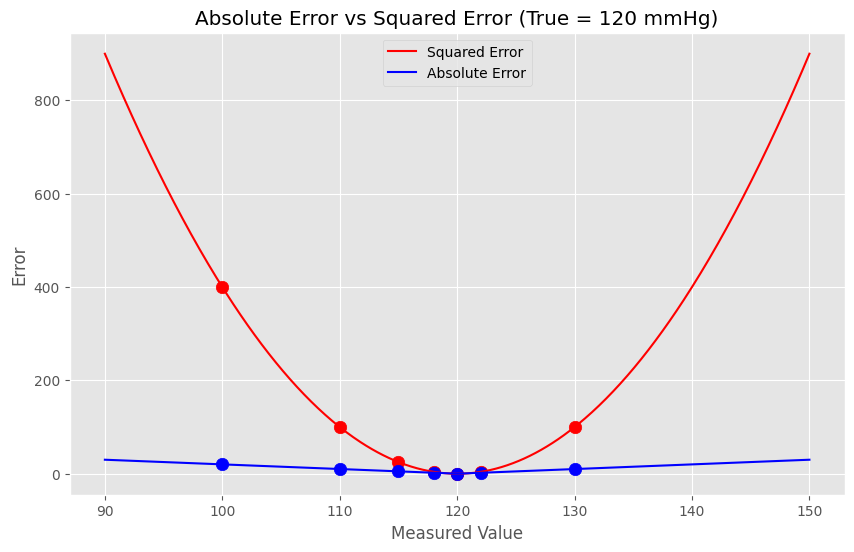

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
true_value = 120
measurements = np.linspace(90, 150, 500)
# Compute errors
squared_error = (measurements - true_value) ** 2
absolute_error = abs(measurements - true_value)
plt.plot(measurements, squared_error, label='Squared Error', color='red')
plt.plot(measurements, absolute_error, label='Absolute Error', color='blue')
student_measurements = [118, 122, 110, 115, 120, 130, 100]
for m in student_measurements:
    plt.scatter(m, (m - true_value)**2, color='red', s=80)
    plt.scatter(m, abs(m - true_value), color='blue', s=80)
plt.xlabel('Measured Value')
plt.ylabel('Error')
plt.title('Absolute Error vs Squared Error (True = 120 mmHg)')
plt.legend()
plt.show()


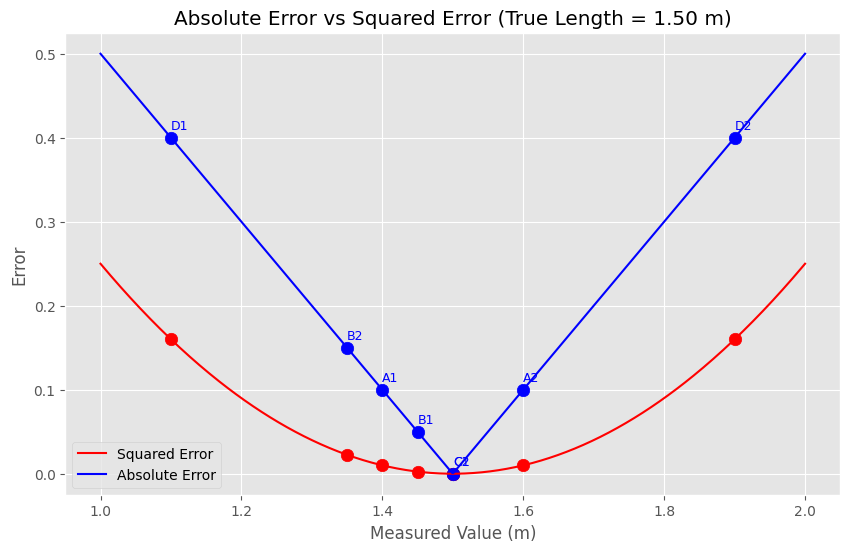

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
true_value = 1.50
measurements = np.linspace(1.0, 2.0, 500)
squared_error = (measurements - true_value) ** 2
absolute_error = abs(measurements - true_value)
plt.plot(measurements, squared_error, label='Squared Error', color='red')
plt.plot(measurements, absolute_error, label='Absolute Error', color='blue')
student_measurements = {
    "A1": 1.40, "A2": 1.60,
    "B1": 1.45, "B2": 1.35,
    "C1": 1.50, "C2": 1.50,
    "D1": 1.10, "D2": 1.90
}
for name, m in student_measurements.items():
    plt.scatter(m, (m - true_value)**2, color='red', s=80)
    plt.scatter(m, abs(m - true_value), color='blue', s=80)
    plt.text(m, abs(m - true_value)+0.01, name, fontsize=9, color='blue')
plt.xlabel('Measured Value (m)')
plt.ylabel('Error')
plt.title('Absolute Error vs Squared Error (True Length = 1.50 m)')
plt.legend()
plt.show()

You can see that the Mean Squared eror is a great penalty, because it punishes getting things too wrong a lot more.

## Standardisation



# Why Standardize? Comparing Apples and Oranges

Imagine you have scores from two different tests:  

- **Test A:** Scores range from 80–100  
- **Test B:** Scores range from 20–80  

A score of **80** is *amazing* in Test B, but only *average* in Test A.  
👉 How can we compare them fairly?

---

### Standardization

This is where **standardization** comes in.  
By converting scores to **Z-scores**, we re-frame them in terms of:

$$
Z = \frac{x - \mu}{\sigma}
$$

where  
- $x$ = value,  
- $\mu$ = mean,  
- $\sigma$ = standard deviation.  

This puts all variables on a **common scale**, allowing for meaningful comparisons.

---

### Interpreting Z-scores

- A **Z-score of +1.5** means the value is *1.5 standard deviations above the mean*.  
- A **Z-score of -0.8** means the value is *0.8 standard deviations below the mean*.  

---

### Why this helps?

Now we can directly compare a student's performance in **Physics** and **Maths**, even if the tests had **different difficulties and score ranges**.


We consider the Titanic dataset

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
print(titanic.shape)


(891, 15)


In [ ]:
titanic.select_dtypes(include="number").agg(["mean", "var", "std"])

,survived,pclass,age,sibsp,parch,fare
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
var,0.236772,0.699015,211.019125,1.216043,0.649728,2469.436846
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429


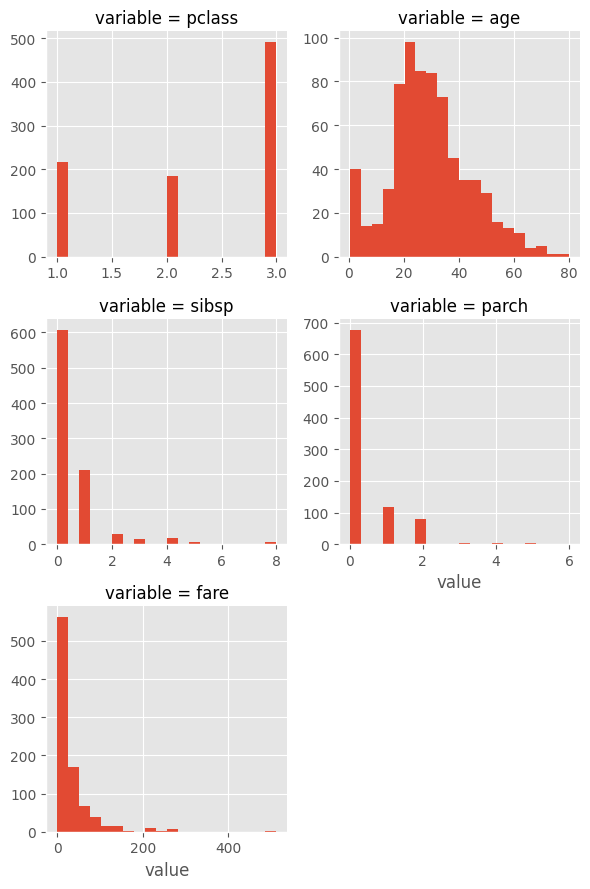

In [ ]:
# Select only numeric columns before melting
titanic_numeric = titanic.select_dtypes(include="number")
g = sns.FacetGrid(titanic_numeric.melt("survived"), col="variable", col_wrap=2, sharex=False, sharey=False)
g.map(plt.hist, "value", bins=20)
plt.show()

In [ ]:
titanic["age_std"] = (titanic["age"] - titanic["age"].mean()) / titanic["age"].std()
titanic["fare_std"] = (titanic["fare"] - titanic["fare"].mean()) / titanic["fare"].std()

In [ ]:
titanic["profile_score"] = titanic[["age_std", "fare_std"]].mean(axis=1)
titanic.sort_values("profile_score", ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_std,fare_std,profile_score
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False,0.433751,9.661740,5.047746
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True,0.364911,9.661740,5.013326
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True,0.364911,9.661740,5.013326
557,0,1,male,NaN,0,0,227.5250,C,First,man,True,NaN,Cherbourg,no,True,NaN,3.930516,3.930516
527,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True,NaN,3.814891,3.814891


<Axes: xlabel='survived', ylabel='age_std'>

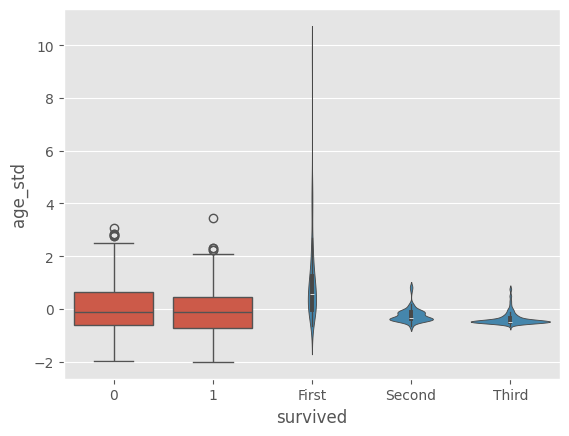

In [ ]:
sns.boxplot(x="survived", y="age_std", data=titanic)
sns.violinplot(x="class", y="fare_std", data=titanic)

What can we conclude?

- Standardization allows us to compare passengers’ age and fare on the same scale.
- A passenger with age_std = +1.5 is 1.5 standard deviations older than average.
- A fare_std = -1.2 means the passenger paid significantly less than average.
- This helps identify outliers, wealthier passengers, or age clusters across survival status.


# Mathematics of Probability

## Conditional Probability
|Sex/Handedness|Right handed| Left handed|
|--------------|-----------:|-----------:|
|Male          |43          | 9          |
|Female        |44          | 4          |

The contingency table above summarises some fake data collected from 100 respondents on genders and handedness.

**What is the probability that any one respondent in our survey is female?** To calculate the probability, divide the number of events by the sample space: $\frac{44+4}{100}=0.48$. It is a little more likely that our respondents are male than female.

However, what is the probability that a female in our sample is **left-handed**? Quite unlikely. To quantify the likelihood, we could divide the number of left-handed females by the number of females in our sample: $\frac{4}{48}=\frac{1}{12}$.

$\frac{1}{12}$ is a **conditional probability**: a probability under a condition. Note that to calculate the conditional probability, we restrict the sample space under consideration to a condition, and then recalculate the probability as if the condition were the entire sample space.

A general formula for conditional probability is as follows. The conditional probability of A given B is

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

We take the joint probability $P(A\cap B)$ and 'inflate' it with the probability of $P(B)$.

Conditional probabilities are fundamental to the idea of **independence**. Recall that we defined independence of two events A and B as

> the probability of event A is not changed by the occurence of event B.

We can restate the definition above as

$$P(A|B)=P(A)$$

Consider whether handedness is independent of sex. The probability of being left-handed is $11/100$, or 0.11. As you might expect, it's close to the conditional probability $P(left$-$handed|female)=0.12$.

## Law of Total Probability

Let $A_1, \dots A_n$ be mutually exclusive and exhaustive events, where $P(A)\neq 0$ for all $A$. Then, the probability of $P(B)$ can be defined as

$$P(B)=\sum^n_{i=1}P(B|A_i)P(A_i)$$

### Example

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10.

What is the probability of testing positive for the disease?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$


$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14
\end{align}$$

## Bayes' Theorem

### Updating Our Beliefs with Evidence

Bayes' Theorem is one of the most important concepts in probability theory. It provides a mathematical way to update our existing beliefs in light of new evidence. It's the engine behind many machine learning algorithms (like Naive Bayes classifiers) and is a cornerstone of modern statistical inference.

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

$$Posterior=\frac{Likelihood\times Prior}{Evidence}$$

An informal way of putting Bayes' Theorem:

$$P(pred|data)=\frac{P(data|actual)P(actual)}{P(data)}$$

The proof for Bayes' Theorem follows from the definition of conditional independence. We know that

$$\begin{align}
P(A\cap B)&=P(A|B)\times P(B)\\
&=P(B|A)\times P(A)
\end{align}$$

This can be rearranged to state Bayes's Theorem:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$


# Key Terms in Bayes' Theorem

- **$P(A)$ (Prior):**  
  Our initial belief about event $A$ before seeing any new data.  

- **$P(B \mid A)$ (Likelihood):**  
  The probability of seeing the data $B$, given that our hypothesis $A$ is true.  

- **$P(B)$ (Evidence):**  
  The total probability of observing the data $B$ under all possible hypotheses.  

- **$P(A \mid B)$ (Posterior):**  
  Our updated belief about $A$ after we have seen the data $B$.  


**Example 1**

You want to go for a picnic today but it is cloudy in the morning. From experience, you know that:

- the probability of raining on any given day is 10%,
- the probability that it is cloudy on any given day is 40%, and
- 50% of all rainy days start off cloudy.

What is the probability of raining given that it is cloudy?

$P(Rain | Cloud) = \frac {P(Cloud | rain) \times P(rain)}{P(Cloud}=\frac{0.5\times 0.1}{0.4}=0.125$


**Example 2**

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10.

If you have been tested positive for a disease. What is the probability that you actually have the disease?

What is the probability of actually getting the disease given tested positive?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$

As we've done earlier, we can use the law of total probability to find $P(T=1)$:

$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14\end{align}$$

Note that $$P(T = 1|D = 1) = 0.95$$ is the likelihood and $$P(D = 1) = 0.1$$ is the prior.


$\begin{align}
P(D=1|T=1)&=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}\\
&=\frac{0.95\times 0.1}{0.14}\\
&=0.68
\end{align}$

### The Surprising Result

The result of Example 2 is often shocking: even though you tested positive with a 95% accurate test, there's only a 68% chance you actually have the disease!

**Why?**

Because the prior probability of having the disease was so low (10%). The large number of healthy people getting false positives creates a significant pool of "positive tests" that don't come from sick individuals. This highlights how crucial it is to consider the base rate (prior) when interpreting new evidence.

# What is a Random Variable?

In mathematics, a variable like $x$ can hold a value.  
A **random variable** is similar, but its value is the **numerical outcome of a random phenomenon**.  

We don't know what its value will be until we run the experiment,  
but we *can* know the probability of its possible values.

---

### Example

Think of it as a **bridge** between the outcomes of an experiment and a number.  

For a coin toss, we could define a random variable $X$ as:

- $X = 1$ if the coin is **Heads**  
- $X = 0$ if the coin is **Tails**  

---

There are two main types of random variables:


- A **continuous random variable** takes on infinitely many values/real numbers. In fact, the probability of a continuous random variable taking on any one value is 0.
- A **discrete random variable** takes on a finite set of values, e.g. counts.


### Continuous Random Variable

- **Definition:** Can take on any value within a given range.  
- **Examples:**  
  - A person's exact height  
  - The temperature of a room  
  - The time it takes to run a race  

---

### Key Idea

Because there are **infinitely many possible values**, the probability of the variable being *exactly one specific value* (e.g., height = 175.12345... cm) is:

$$
P(X = x) = 0
$$

Instead, we measure the probability of it falling **within a range** (e.g., height between 175 cm and 176 cm).


### Discrete Random Variable

- **Definition:** Can only take on specific, **countable values**.  

- **Examples:**  
  - The result of a dice roll (1, 2, 3, 4, 5, or 6)  
  - The number of heads in 5 coin flips (0, 1, 2, 3, 4, or 5)  
  - The number of customers that enter a store in an hour  


## Probability Distributions
A random variable is a variable whose possible values are the outcomes of a non-deterministic process.

### What is a Probability Distribution?

A **probability distribution** is a function or a table that describes all the possible values a random variable can take and their corresponding probabilities.  
It’s like a **"blueprint"** for a random variable.  

- **For discrete random variables:**  
  - Called a **Probability Mass Function (PMF)**  
  - Tells you the exact probability for each specific value.  
  - Example: \( P(X = k) \)  

- **For continuous random variables:**  
  - Called a **Probability Density Function (PDF)**  
  - Describes the likelihood of the variable falling within a range.  
  - The **area under the PDF curve** for a given range is the probability.  


### Binomial distribution

We start with the **binomial distribution**. The binomial distribution models the probability of $k$ successes in $n$ independent trials.

### When to Use the Binomial Distribution  

The **Binomial distribution** is your tool of choice when your experiment meets the following four conditions:  

1. **Fixed number of trials (n):**  
   You are repeating the experiment a set number of times.  
   *Example: flipping a coin 10 times.*  

2. **Independent trials:**  
   The outcome of one trial does not affect the others.  
   *Example: the first coin flip doesn't change the second.*  

3. **Only two outcomes:**  
   Each trial has only two possible outcomes, which we label **"success"** and **"failure."**  
   *Example: Heads vs. Tails, Win vs. Lose.*  

4. **Constant probability (p):**  
   The probability of "success" is the same for every trial.  
   *Example: the probability of Heads is always 0.5.*  

👉 We are interested in the probability of getting **exactly \(k\) successes**.  

Let's redo the lecture example with `scipy`. Import the `binom` class from `scipy.stats`:

In [ ]:
from scipy.stats import binom

 ####Tossing a Fair Coin 6 Times
#### What’s the probability of getting exactly 2 heads?


#### Case 1: Define "success" = -  getting a head
- \( n = 6 \)  
- \( p = 0.5 \)  
- \( k = 2 \)

#### Case 2: What’s the probability of getting at most 2 heads?  
- P(X \leq 2) = P(X=0) + P(X=1) + P(X=2)

We use the `.pmf` method of the `binom` class. `pmf` stands for **probability mass function**: a function that states the probability that a discrete random variable is equal to any one value.

In [ ]:
prob_2_heads = binom.pmf(k=2, n=6, p=0.5)
print("P(X=2):", prob_2_heads)

P(X=2): 0.23437500000000003


In [ ]:
prob_at_most_2 = binom.cdf(2, n=6, p=0.5)
print("P(X ≤ 2):", prob_at_most_2)

P(X ≤ 2): 0.34375


##Example 2: Quality Control in a Factory
A machine produces 10 items. Each has a 90% chance of being defect-free. What’s the probability that exactly 8 are defect-free?
🔧 Setup:
- Define “success” = defect-free item
- n = 10, p = 0.9, k = 8

In [ ]:
prob_8_good = binom.pmf(k=8, n=10, p=0.9)
print("P(X=8):", prob_8_good)

P(X=8): 0.1937102444999998


 ##What’s the probability that at least 8 are defect-free?
 Use complement:

In [ ]:
prob_at_least_8 = 1 - binom.cdf(7, n=10, p=0.9)
print("P(X ≥ 8):", prob_at_least_8)

P(X ≥ 8): 0.9298091736


The answer is what we should expect. If we win 3 in 4 games, it's unlikely we lose 5 in 5 games.

Now, suppose we want to know what is the probability of winning 3 games or less. We want to find $P(X \leq 3)$.

Note $P(X \leq 3) = P(X=0)+ P(X=1)+P(X=2)+P(X=3)$.

By the **complement rule**, $P(X \leq 3) = 1 - P(X=5)-P(X=4)$.



### Cumulative Distribution Function (CDF)

The **cumulative distribution function (CDF)**, denoted as \( F(x) \), is defined as:

$$
F(x) = P(X \leq x)
$$

---

🔹 **Intuition**:  
The CDF gives the probability that the random variable \( X \) takes a value **less than or equal to** \( x \).

---

🔹 **Shortcut property**:  
Instead of computing the PMF (Probability Mass Function) for multiple values and summing them:

$$
P(X \leq 3) = P(X=0) + P(X=1) + P(X=2) + P(X=3)
$$

the **CDF** does it in one step:

$$
F(3) = P(X \leq 3)
$$

So in Python/Colab you can directly use `.cdf()` to get this cumulative probability instead of adding up individual `.pmf()` values.


### Normal distribution

We move on to the **normal distribution**. There are some key properties that are important to know about this distribution:

- The mean, median and mode of the distribution is the same.
- The curve is bell-shaped.
- The total area under the curve is 1.
- Symmetric about the mean.

There are two key **shape parameters** that define the location and spread of the normal distribution: the mean, commonly denoted as $\mu$; and the standard deviation, commonly denoted as $\sigma$.

**Mean ($\mu$):**  
This parameter controls the center of the bell curve. Shifting the mean moves the entire curve left or right along the x-axis.  

**Standard Deviation ($\sigma$):**  
This parameter controls the spread or width of the bell curve.  
- A small $\sigma$ results in a tall, narrow curve, meaning the data is tightly clustered around the mean.  
- A large $\sigma$ results in a short, wide curve, meaning the data is more spread out.  


Again, start by importing the `norm` class from `scipy.stats`:

In [ ]:
from scipy.stats import norm

#### Standard normal distribution

A normally distributed random variable with mean 0 and standard deviation 1 is said to follow the standard normal distribution, also known as the **z-distribution**.

The Standard Normal Distribution is a special, "reference" version of the normal distribution. It's incredibly useful because we can convert any normal distribution into this standard form.

A normally distributed random variable can be converted into the standard normal distribution by standardisation:

$$Z = \frac{X-\mu}{\sigma}$$

This formula calculates the **Z-score**.
It tells us exactly how many standard deviations a value $X$ is away from its mean $\mu$.




<div class="alert alert-info">
    <b>Note:</b> The <code>.pdf</code> method refers to the <b>probability density function</b>, which is the counterpart of the probability mass function for continuous random variables.
</div>

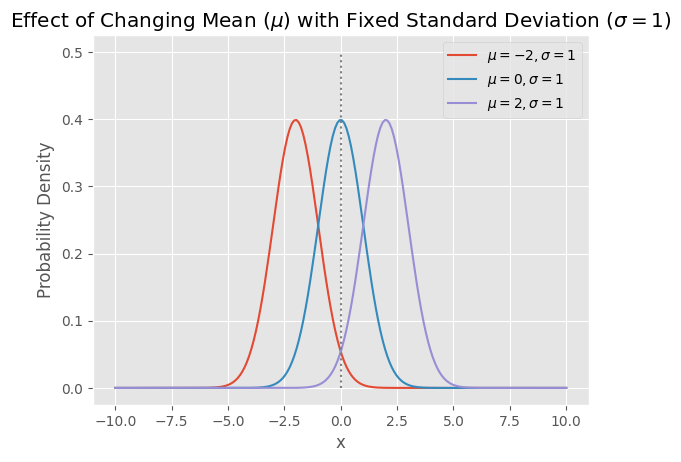

In [ ]:
x = np.linspace(-10, 10, 200)
f1 = norm.pdf(x, loc=-2, scale=1)
f2 = norm.pdf(x, loc=0, scale=1)
f3 = norm.pdf(x, loc=2, scale=1)
plt.plot(x, f1, label=r"$\mu=-2, \sigma=1$")
plt.plot(x, f2, label=r"$\mu=0, \sigma=1$")
plt.plot(x, f3, label=r"$\mu=2, \sigma=1$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted", colors="gray")
plt.legend()
plt.title(r"Effect of Changing Mean ($\mu$) with Fixed Standard Deviation ($\sigma=1$)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

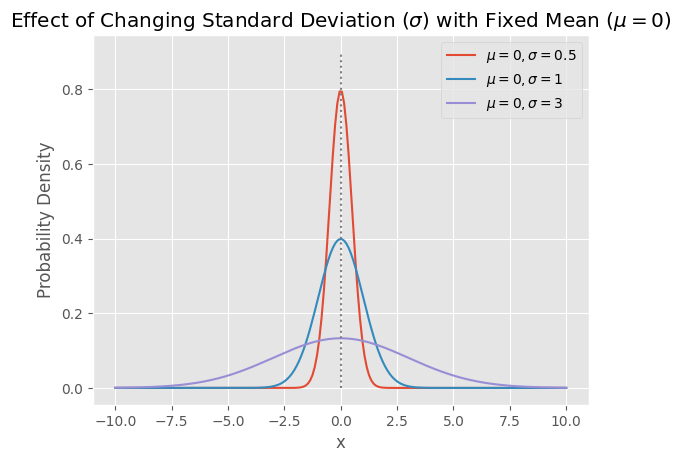

In [ ]:
x = np.linspace(-10, 10, 200)
f1 = norm.pdf(x, loc=0, scale=0.5)
f2 = norm.pdf(x, loc=0, scale=1)
f3 = norm.pdf(x, loc=0, scale=3)
plt.plot(x, f1, label=r"$\mu=0, \sigma=0.5$")
plt.plot(x, f2, label=r"$\mu=0, \sigma=1$")
plt.plot(x, f3, label=r"$\mu=0, \sigma=3$")
plt.vlines(x=0, ymin=0, ymax=0.9, linestyles="dotted", colors="gray")
plt.legend()
plt.title(r"Effect of Changing Standard Deviation ($\sigma$) with Fixed Mean ($\mu=0$)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

With continuous distributions, we do not want to find the probability of a random variable at any given value. Since the range is infinite, the probability that a continuous random variable takes on any given value is zero.

We are usually interested in finding out the probability that the random variable lies between two values.



#### Programmatic solutions: percent point function

Recall the definition of the **cumulative density function**:

$$F(x)=P(X\leq x)$$

The CDF returns the probability that a random variable is less than $x$. For instance, because of the symmetric shape of the normal distribution, the CDF of the standard normal distribution at 0 is expected to be 0.5.

In [ ]:
norm.cdf(0)

np.float64(0.5)

Visually, `norm.cdf(0)` calculates the total area under the **standard normal curve** to the left of $x = 0$.  

Since the curve is perfectly symmetric, this area is exactly half of the total area of $1$:  

$$ P(X \leq 0) = 0.5 $$


We will also use the **percent point function**, available via the `ppf()` method. The percent point function does the inverse of the cumulative density function. It returns the percent point given the value of the CDF.

The **Percent Point Function (PPF)** is the reverse of the CDF.  

- **CDF**: $F(x) = P(X \leq x)$  
  → "Given a value $x$, what is the total probability to the left of it?"  

- **PPF**: $F^{-1}(p) = x$  
  → "Given a probability $p$, what is the value $x$ that has exactly that much probability to its left?"




In [ ]:
norm.ppf(0.5)

np.float64(0.0)

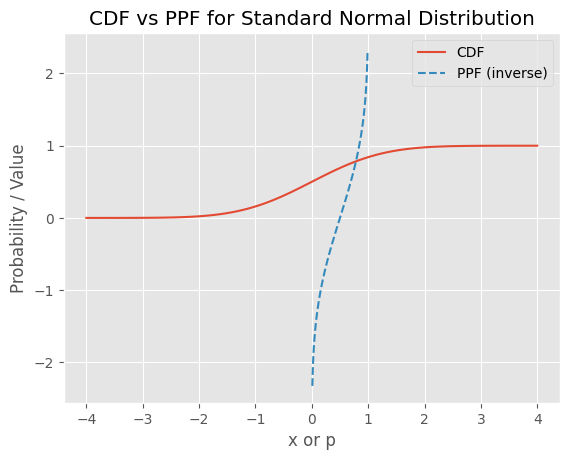

In [ ]:
x = np.linspace(-4, 4, 100)
cdf = norm.cdf(x)
ppf = norm.ppf(np.linspace(0.01, 0.99, 100))
plt.plot(x, cdf, label="CDF")
plt.plot(norm.cdf(ppf), ppf, label="PPF (inverse)", linestyle="dashed")
plt.xlabel("x or p")
plt.ylabel("Probability / Value")
plt.title("CDF vs PPF for Standard Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()

#### Standard deviation rule/empirical rule

A useful rule of thumb is the **standard deviation rule**, or empirical rule.

This rule states that for a normally distributed random variable,
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean, and
- 99.7% of data lies within 3 standard deviations of the mean.

This rule is a fantastic mental shortcut for quickly understanding the spread of normally distributed data without needing a calculator.

#### Example: height

Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

- 84% of Malaysians have height of less than ... cm.

### Thinking with the Empirical Rule

We know that **68%** of the data in a normal distribution lies within **1 standard deviation** of the mean.  
That is:  

- From $(\mu - \sigma)$ to $(\mu + \sigma)$ → $68\%$ of the data.  

Because the normal distribution is symmetric:  
- Half of this $68\%$ lies above the mean.  
- So, $68\% / 2 = 34\%$ lies between $\mu$ and $\mu + \sigma$.  

Now, since **50%** of the data is always below the mean:  

$P(X \leq \mu + \sigma) = 50\% + 34\% = 84\%$



In [ ]:
from scipy.stats import norm
mean = 169.57
std_dev = 7.57
height_84 = norm.ppf(0.84, loc=mean, scale=std_dev)
print(f"84% of Malaysian males are shorter than: {height_84:.2f} cm")

84% of Malaysian males are shorter than: 177.10 cm


- The tallest 2.5% of Malaysians are taller than ... cm

**Thinking with the Empirical Rule:**  
If 95% of data is within $2\sigma$, then $5\%$ is outside ($2.5\%$ in the left tail, $2.5\%$ in the right tail).  
So, the tallest $2.5\%$ are above $\mu + 2\sigma$.  

**Programmatic solution:**  
We’re looking for the point where $97.5\%$ of the data is to the left:

In [ ]:
norm.ppf(0.975, loc=169.57, scale=7.57)

np.float64(184.4069273629682)

In [ ]:
169.57 + 2 * 7.57

184.70999999999998

- The shortest 0.15% of Malaysians are shorter than ... cm

**Thinking with the Empirical Rule:**  
If $99.7\%$ of data is within $3\sigma$, then $0.3\%$ is outside ($0.15\%$ in each tail).  
So, the shortest $0.15\%$ are below $\mu - 3\sigma$.  

**Programmatic solution:**  
We’re looking for the point where $0.15\%$ of the data is to the left:

In [ ]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

np.float64(147.10422390516268)

In [ ]:
169.57 - 3 * 7.57

146.85999999999999

##Example: University Entrance Exam Scores
Suppose scores on a university entrance exam are normally distributed with:
- Mean (μ) = 72
- Standard deviation (σ) = 8
#What score separates the top 2.5% of students?

📐 Thinking with the Empirical Rule
- 95% of scores lie within ±2σ of the mean.
- So, the top 2.5% are above μ + 2σ.

μ + 2σ = 72 + 2 × 8 = 88




In [ ]:
mean = 72
std_dev = 8
score_97_5 = norm.ppf(0.975, loc=mean, scale=std_dev)
print(f"97.5% of students score below: {score_97_5:.2f}")

97.5% of students score below: 87.68


### Poisson distribution

The Poisson distribution models the number of events that occur in a fixed time interval.

Use the Poisson distribution when:
- events occur at random points of time and space, and
- our interest lies is the number of occurrences of the event.

The most important property of the Poisson variable is that the waiting time between events is **memoryless**:
- the time when events occur do not affect the number of successes in an interval;  
- only the length of time affects the number of successes.

Intuition for "Memoryless": Imagine you are waiting for a bus that arrives, on average, every 10 minutes (following a Poisson process). You have already been waiting for 5 minutes. The "memoryless" property means that your expected waiting time for the next 5 minutes is still 10 minutes. The process doesn't "remember" that you've already been waiting. The probability of a bus arriving in the next minute is independent of the past.

The Poisson distribution has a single parameter: lambda ($\lambda$). The mean and variance of the Poisson distribution coincides with the shape parameter $\lambda$.

### Lambda ( $\lambda$ )

This is the key parameter of the **Poisson distribution**.  
It represents the **average rate of events** in the given interval.  

- Example:  
  If a call center receives an average of $10$ calls per hour, then  

  $\lambda = 10$


The probability mass function of the Poisson distribution is as follows:

$$p(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$

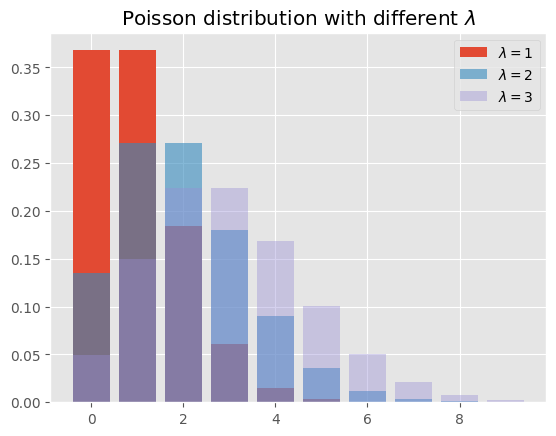

In [ ]:
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)
plt.bar(x, f1, label=r"$\lambda=1$")
plt.bar(x, f2, label=r"$\lambda=2$", alpha=0.6)
plt.bar(x, f3, label=r"$\lambda=3$", alpha=0.4)
plt.legend()
plt.title(r"Poisson distribution with different $\lambda$")
plt.show()

In [ ]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1

np.float64(0.999998874797402)

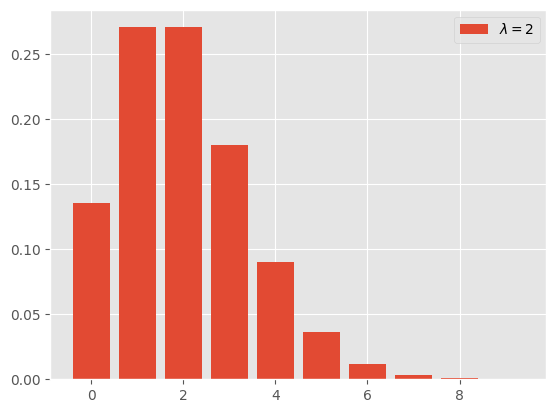

In [ ]:
# for lambda=2, having 2 events is a lot more likely
plt.bar(x, f2, label=r"$\lambda=2$")
plt.legend()

In [ ]:
x @ f2

np.float64(1.999525105343477)

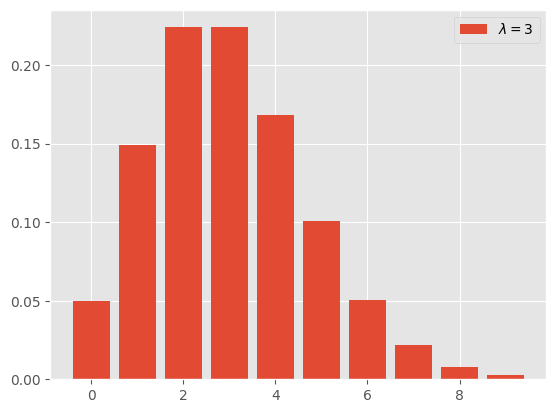

In [ ]:
plt.bar(x, f3, label=r"$\lambda=3$")
plt.legend()

In [ ]:
x @ f3

np.float64(2.9885910238149727)

Modeling Website Hits per Minute

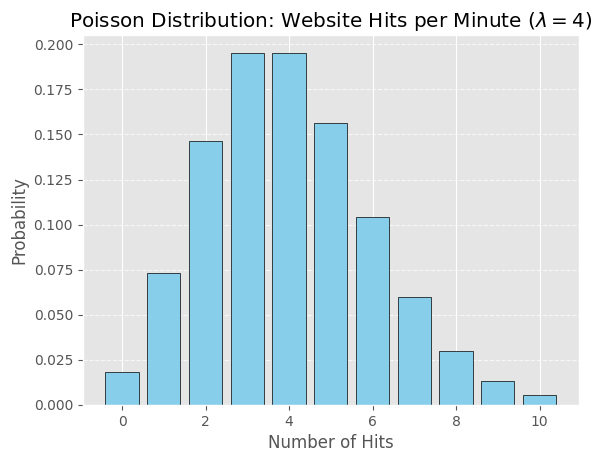

Expected hits per minute: 3.97


In [ ]:
x = np.arange(11)
lambda_hits = 4
pmf_hits = poisson.pmf(x, mu=lambda_hits)
# Plot
plt.bar(x, pmf_hits, color="skyblue", edgecolor="black")
plt.title(r"Poisson Distribution: Website Hits per Minute ($\lambda=4$)")
plt.xlabel("Number of Hits")
plt.ylabel("Probability")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Expected number of hits
expected_hits = x @ pmf_hits
print(f"Expected hits per minute: {expected_hits:.2f}")


Modeling Typos per Page in a BooK

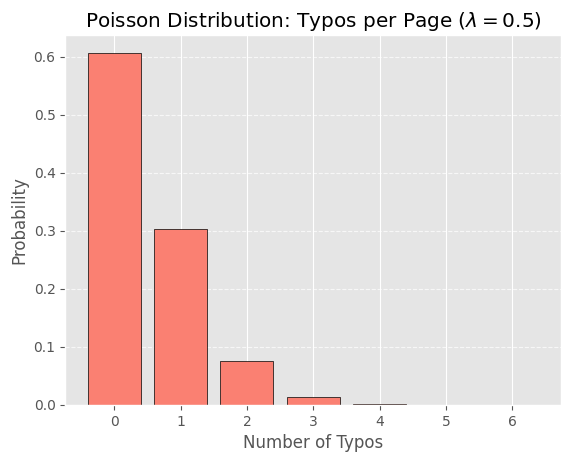

Probability of exactly 2 typos: 0.0758


In [ ]:
x = np.arange(7)
lambda_typos = 0.5
pmf_typos = poisson.pmf(x, mu=lambda_typos)
plt.bar(x, pmf_typos, color="salmon", edgecolor="black")
plt.title(r"Poisson Distribution: Typos per Page ($\lambda=0.5$)")
plt.xlabel("Number of Typos")
plt.ylabel("Probability")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
prob_2_typos = poisson.pmf(2, mu=lambda_typos)
print(f"Probability of exactly 2 typos: {prob_2_typos:.4f}")


## Central Limit Theorem

The Central Limit Theorem helps us reason about realisations of sample means.

Specifically, it tells us that in many repeated samples, the distribution of the sample means of a random variable is normal regardless of the underlying population distribution.

## 📊 The Most Important Theorem in Statistics

### The Central Limit Theorem (CLT)

The **Central Limit Theorem** is arguably the most fundamental concept in statistics.  

**Stated simply:**

No matter what the original population's distribution looks like (it could be **uniform, skewed, or random**), the **distribution of the means of samples** taken from that population will **tend to be a normal distribution**, especially as the **sample size increases**.

---



In [ ]:
from scipy.stats import poisson

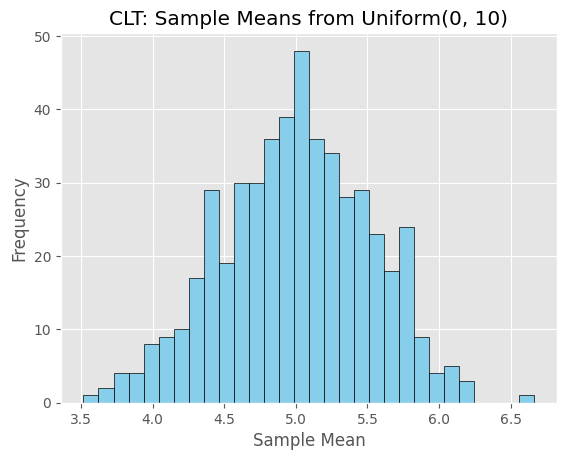

In [ ]:
def sample_uniform(_):
    samples = np.random.uniform(0, 10, size=30)
    return np.mean(samples)
means_uniform = list(map(sample_uniform, np.arange(500)))
plt.hist(means_uniform, bins=30, color="skyblue", edgecolor="black")
plt.title("CLT: Sample Means from Uniform(0, 10)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


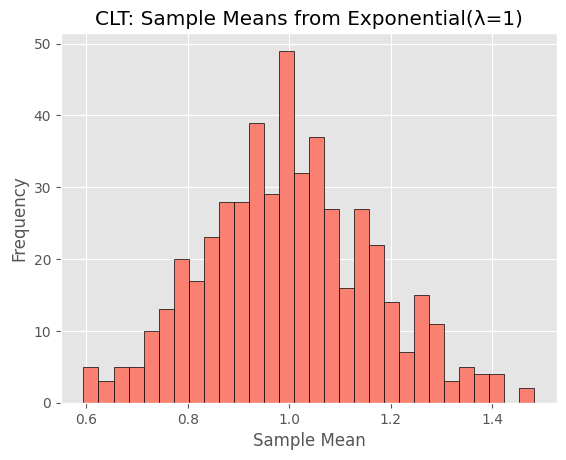

In [ ]:
def sample_exponential(_):
    samples = np.random.exponential(scale=1.0, size=40)
    return np.mean(samples)
means_expo = list(map(sample_exponential, np.arange(500)))
plt.hist(means_expo, bins=30, color="salmon", edgecolor="black")
plt.title("CLT: Sample Means from Exponential(λ=1)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Using Normal Distribution in Weight Initialization

**Normal Distribution** could be very helpful when it comes to weight initialization of deep learning task.

## A Practical Application in Deep Learning

Now let's see how these statistical concepts are critical in a modern field like deep learning.  
One of the key challenges in training deep neural networks is ensuring that information can flow smoothly through many layers of computation.


In deep neural network, we may encounter **vanishing/exploding gradients** when the derivaties become very small or very big. The activations and derivatives will be decreased/increased exponentially as a function of number of layers. This will make training difficult, especially when gradients are exponentially smaller, then gradient descent wiill take tiny little steps. Consequently it will take a long time for gradient descent to learn anything.

Therefore, using a normal distributed weight initiallization with mean equals to 0 and a standard deviation of 1 could be helpful in resolving the issue.

### The Solution: Smart Initialization

The problem arises from how we set the initial **weights** (the parameters the network learns).  
- If they are too small, the signal dies out (*vanishes*).  
- If they are too large, the signal grows uncontrollably (*explodes*).  

The solution is to initialize the weights *just right*.  
A very effective technique is to draw the initial weights from a **Normal Distribution** with:  
- Mean = 0  
- A very specific standard deviation (depending on the size of the previous layer in the network)  


For example, when we using ReLU as our activation function, we would do the following steps:

- Generate random sample of weights from a Normal Distribution having mean equals 0 and a standard deviation of 1.
- Multiply the sample with $\sqrt{(\frac{2}{n_i})}$, where $n_i$ is number of input units for that layer.

```np.random.rand(shape) * np.sqrt(2/n[l-1])```, where `l` is the total number of input units.

> This initialization is also called **Xavier Initialization** or **He Initialization**.

This sort of initialization helps to set the weight matrix neither too bigger than 1, nor too smaller than 1. Thus it doesn’t explode or vanish gradients respectively.

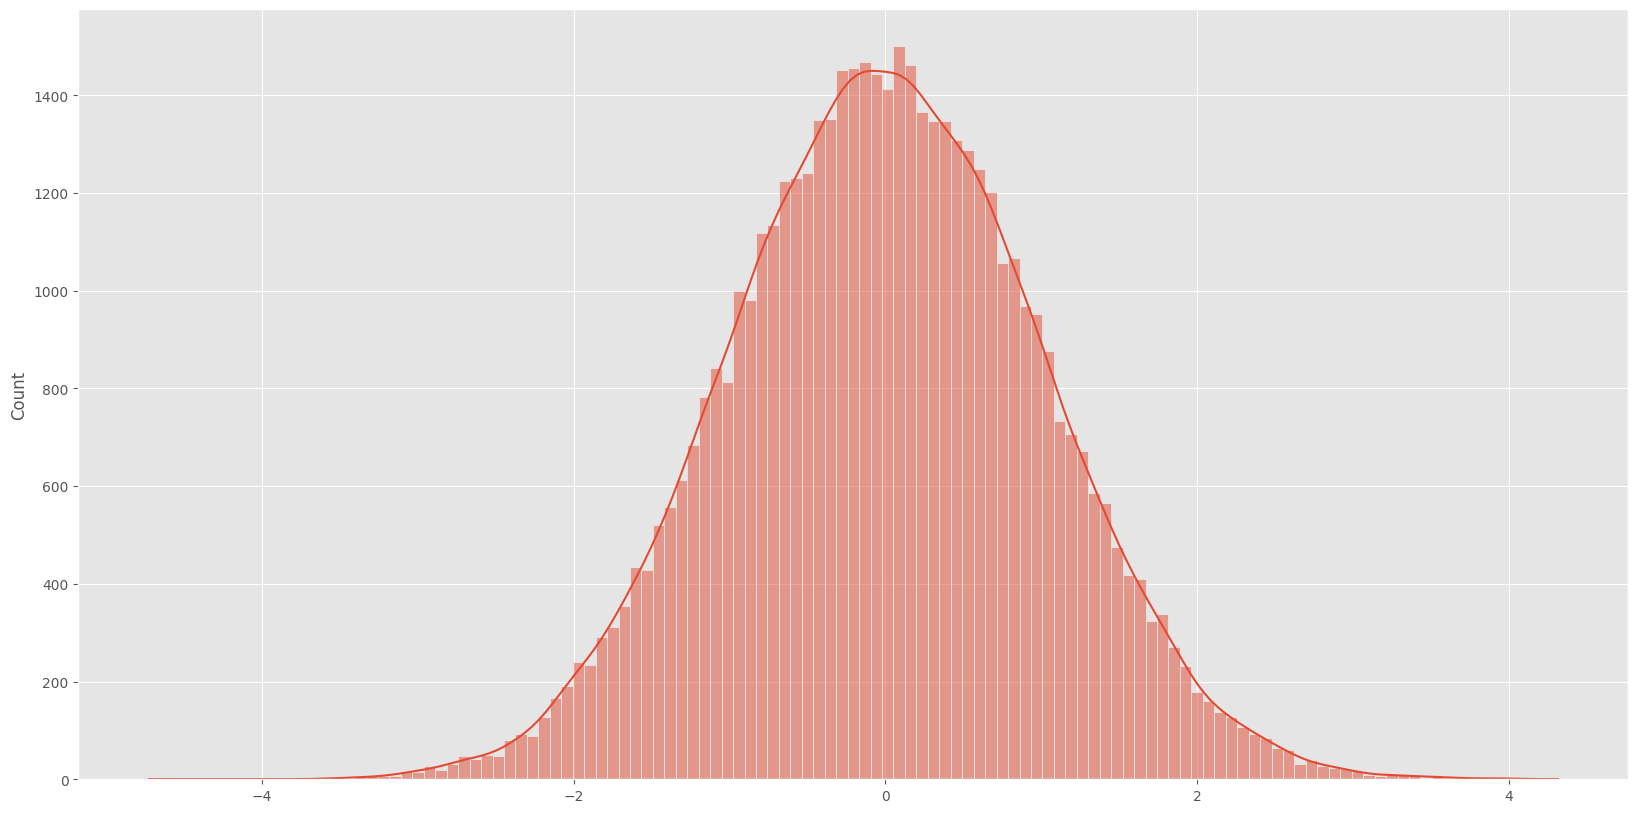

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

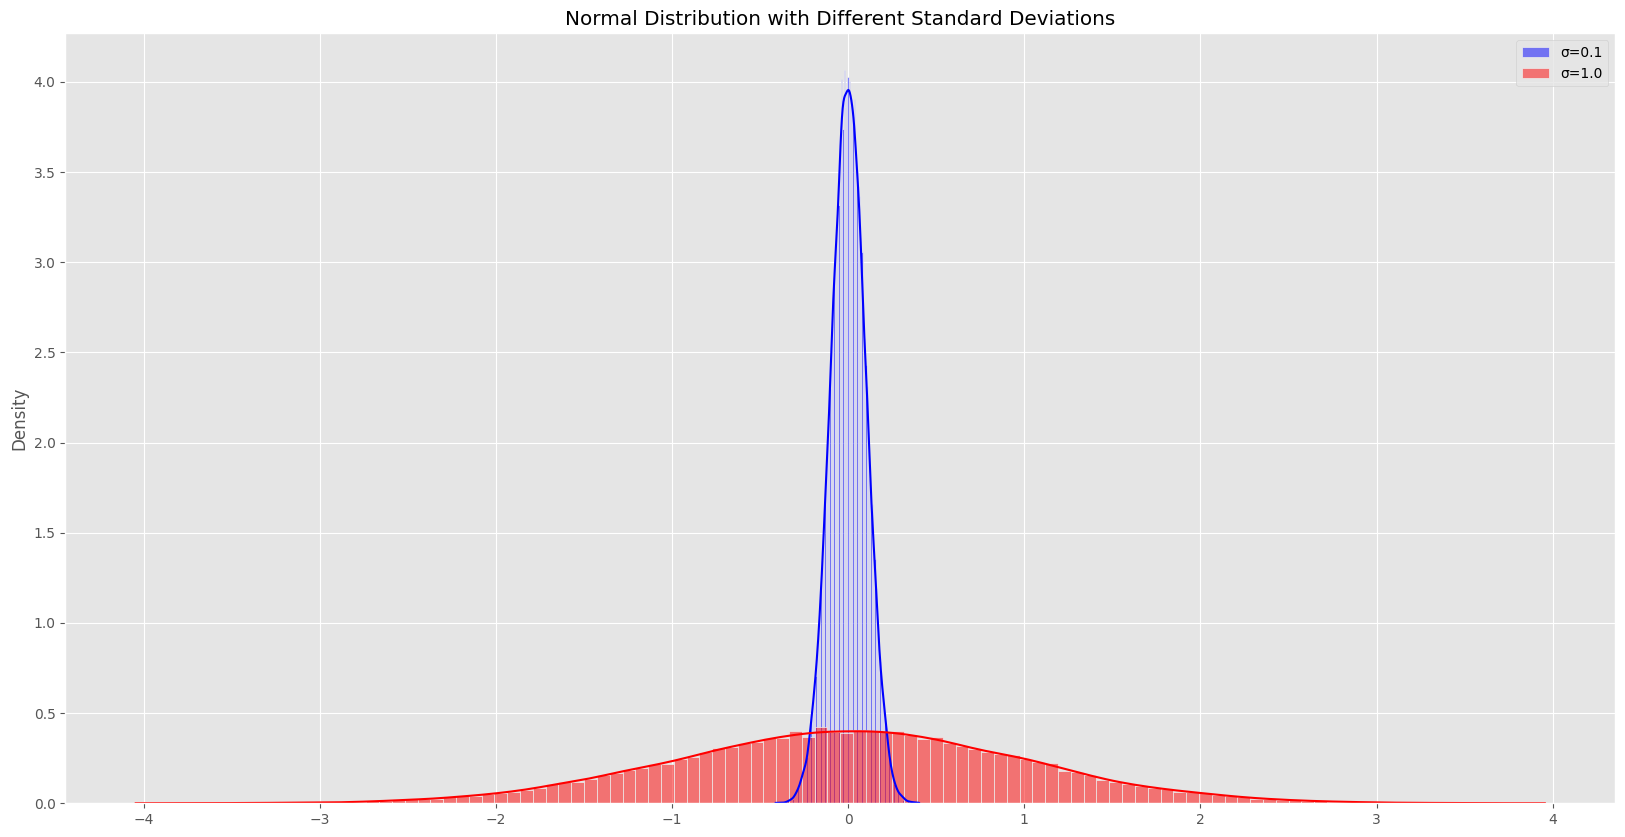

In [ ]:
plt.figure(figsize=(20, 10))
x1 = np.random.normal(loc=0, scale=0.1, size=50000)
x2 = np.random.normal(loc=0, scale=1.0, size=50000)
sns.histplot(x1, kde=True, color="blue", label="σ=0.1", stat="density")
sns.histplot(x2, kde=True, color="red", label="σ=1.0", stat="density")
plt.title("Normal Distribution with Different Standard Deviations")
plt.legend()
plt.show()


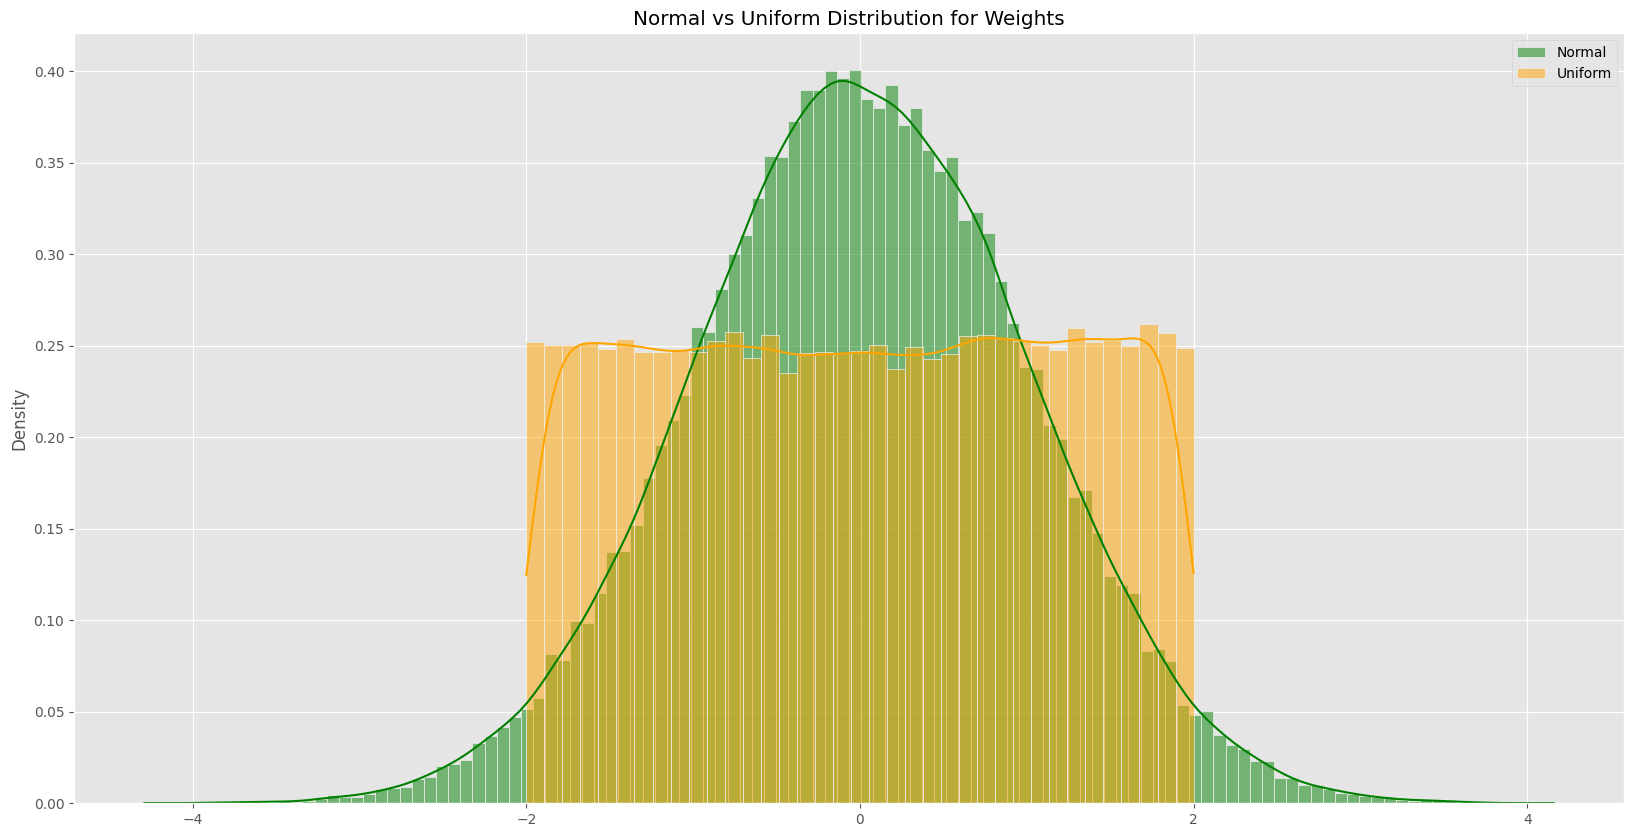

In [ ]:
plt.figure(figsize=(20, 10))
x_norm = np.random.normal(0, 1, 50000)   # Normal distribution
x_uni = np.random.uniform(-2, 2, 50000)  # Uniform distribution
sns.histplot(x_norm, kde=True, color="green", label="Normal", stat="density")
sns.histplot(x_uni, kde=True, color="orange", label="Uniform", stat="density")
plt.title("Normal vs Uniform Distribution for Weights")
plt.legend()
plt.show()

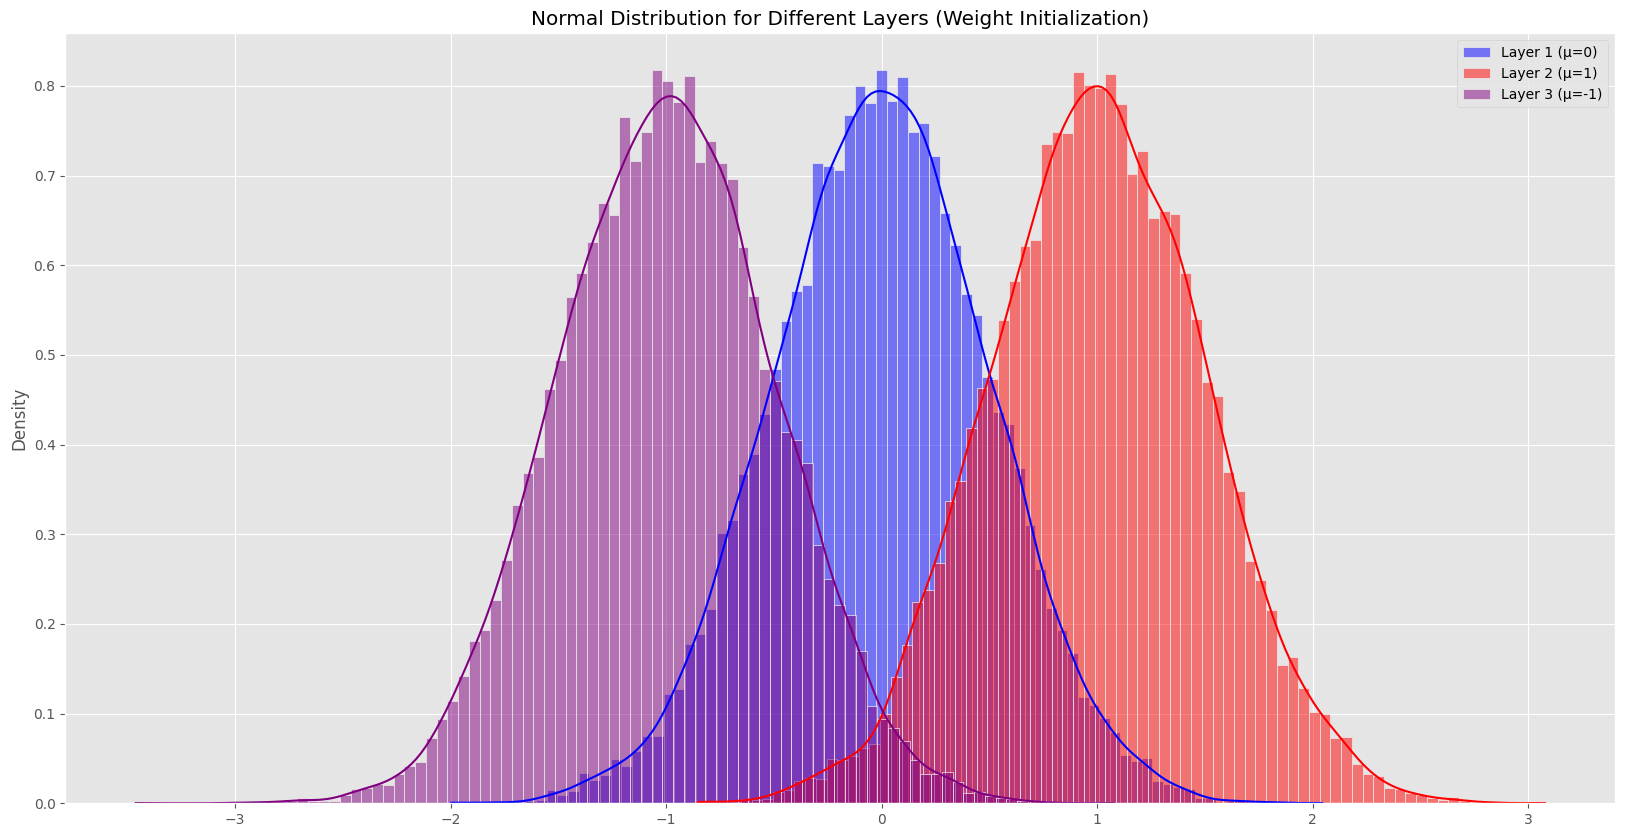

In [ ]:
plt.figure(figsize=(20, 10))
x_layer1 = np.random.normal(loc=0, scale=0.5, size=20000)
x_layer2 = np.random.normal(loc=1, scale=0.5, size=20000)
x_layer3 = np.random.normal(loc=-1, scale=0.5, size=20000)
sns.histplot(x_layer1, kde=True, color="blue", label="Layer 1 (μ=0)", stat="density")
sns.histplot(x_layer2, kde=True, color="red", label="Layer 2 (μ=1)", stat="density")
sns.histplot(x_layer3, kde=True, color="purple", label="Layer 3 (μ=-1)", stat="density")
plt.title("Normal Distribution for Different Layers (Weight Initialization)")
plt.legend()
plt.show()

# Entropy (Optional)

Now we define a quantity called entropy, which essentially means how much information is conveyed by probability.

### Entropy: A Measure of Surprise or Uncertainty

In simple terms, **entropy** is a measure of randomness or unpredictability.  
It's a way to quantify *"how much surprise"* is in an event.  
The more uncertain or random an event is, the higher its entropy.

- **Low Entropy:** A predictable system.  
  Example: A biased coin that lands on heads 99.9% of the time.  
  The outcome is almost certain. Observing "heads" gives very little new information since you already expected it.  
  → This system has **low entropy**.

- **High Entropy:** An unpredictable system.  
  Example: A fair coin.  
  You have no idea whether it will be heads or tails. The uncertainty means the outcome provides the maximum amount of new information (**1 bit of information**).  
  → This system has **high entropy**.


## A solid-liquid-gas example

When no probability is involved, i.e. everything is known before hand, no information is gained from the experiment. All the results of the experiment could be predetermined. Look at the images below, which represent the molecules of a solid, which have low to no entropy (perfectly ordered crystal).

The state of molecules in a substance is a great physical analogy for **entropy**.

- **Solid (Low Entropy):**  
  The molecules are locked in a fixed, orderly crystal lattice.  
  Their positions are highly predictable. There is very little randomness or surprise.


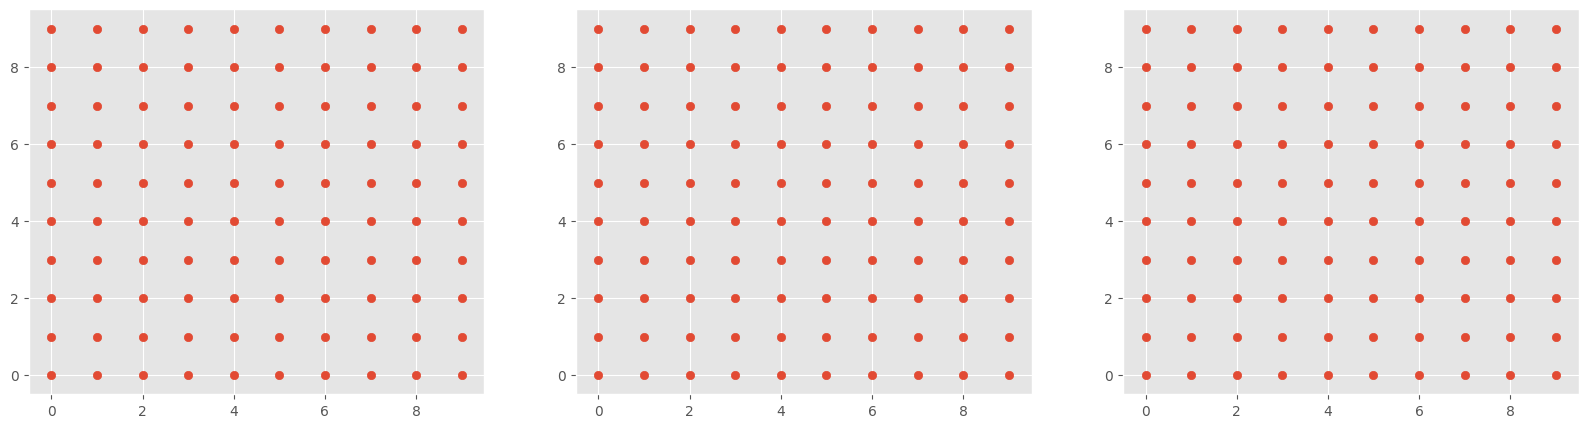

In [ ]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

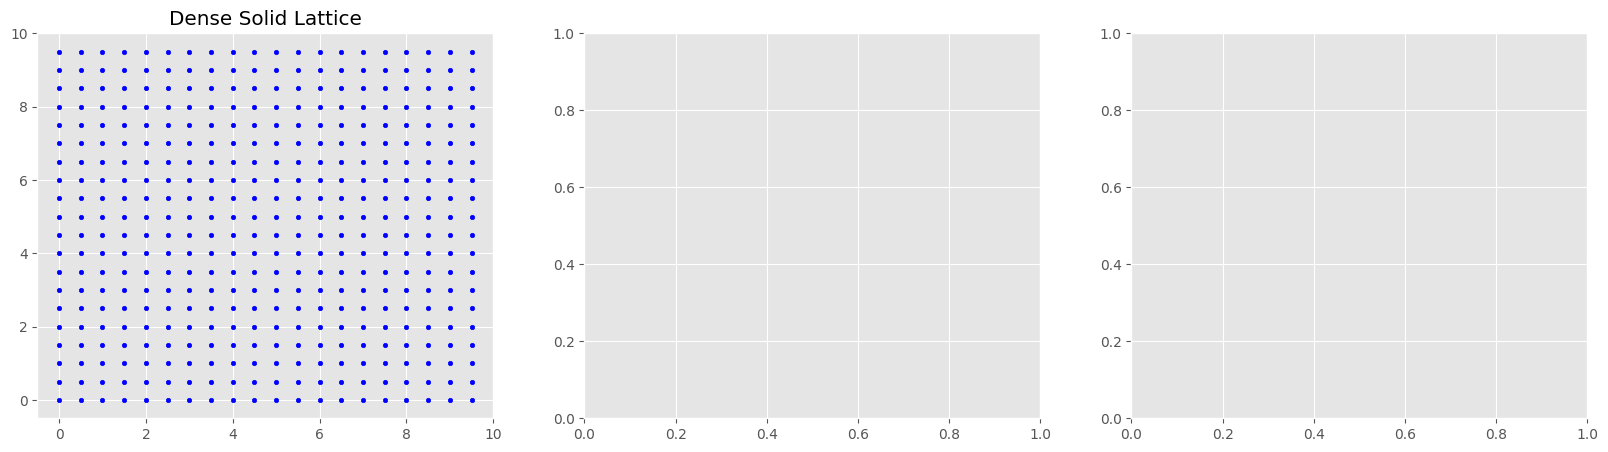

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
x, y = np.meshgrid(np.arange(0, 10, 0.5), np.arange(0, 10, 0.5))
axs[0].scatter(x.ravel(), y.ravel(), color="blue", s=10)
axs[0].set_title("Dense Solid Lattice")
axs[0].set_xlim(-0.5, 10)
axs[0].set_ylim(-0.5, 10)
plt.show()

Now that we have probability in the game, we can visualize the same for say gases, when we draw the samples from a probability distribution that is uniform, a lot of information is conveyed.

- **Gas (High Entropy):**  
  The molecules are moving randomly and are spread out uniformly throughout their container.  
  Their positions are highly unpredictable. Knowing the position of one molecule tells you nothing about the others.  
  This is a **high entropy system**.


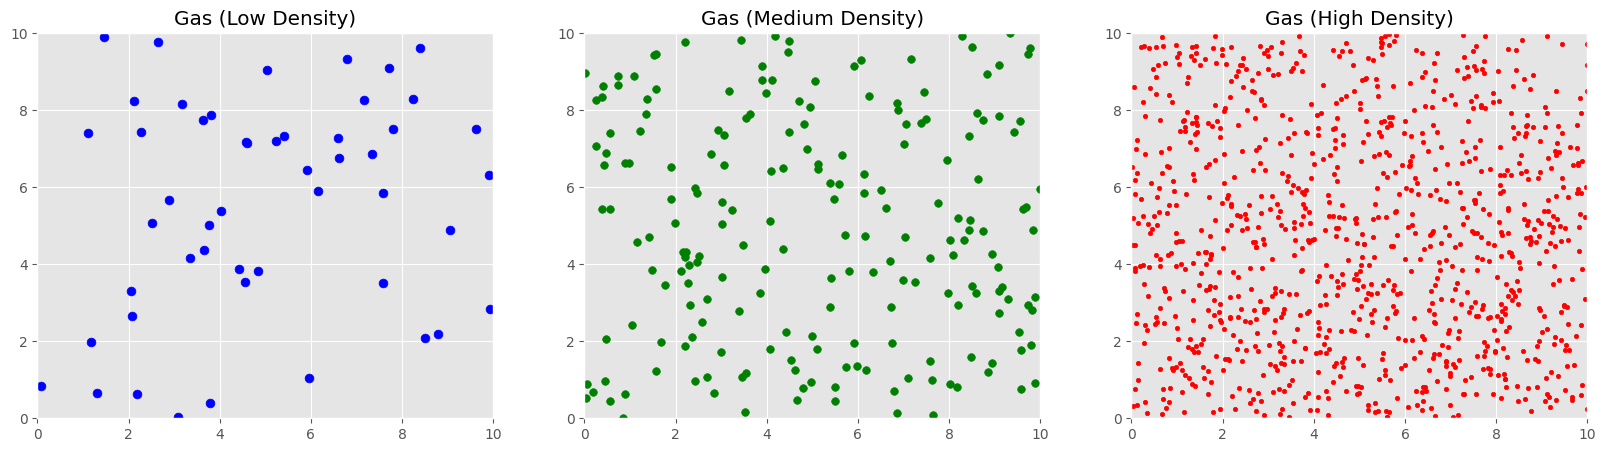

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Low density gas
x, y = np.random.random(50) * 10, np.random.random(50) * 10
axs[0].scatter(x, y, color="blue", s=40)
axs[0].set_title("Gas (Low Density)")
axs[0].set_xlim(0, 10)
axs[0].set_ylim(0, 10)
# Medium density gas
x, y = np.random.random(200) * 10, np.random.random(200) * 10
axs[1].scatter(x, y, color="green", s=30)
axs[1].set_title("Gas (Medium Density)")
axs[1].set_xlim(0, 10)
axs[1].set_ylim(0, 10)
# High density gas
x, y = np.random.random(1000) * 10, np.random.random(1000) * 10
axs[2].scatter(x, y, color="red", s=10)
axs[2].set_title("Gas (High Density)")
axs[2].set_xlim(0, 10)
axs[2].set_ylim(0, 10)
plt.show()

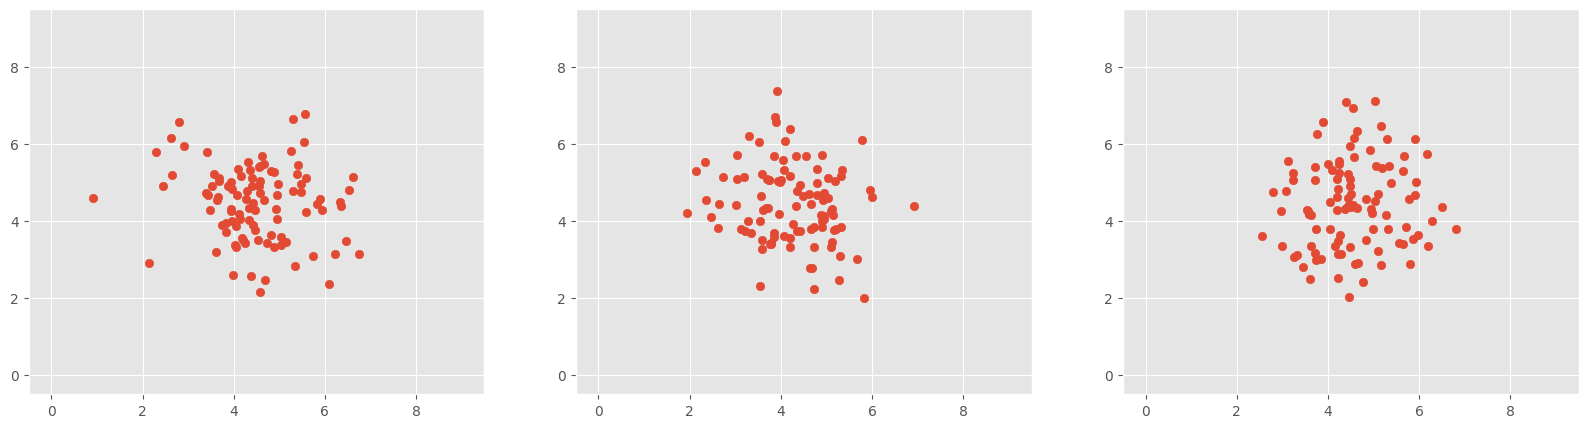

In [ ]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

And if there is some randomness, but not complete, then less information is gained, and it has less entropy.

- **Liquid (Medium Entropy):**  
  The molecules are not fixed but are still clustered together due to intermolecular forces.  
  Their positions have some randomness (drawn from a Normal distribution in this simulation), but they are not completely unpredictable.  
  This represents a state of **medium entropy** — more surprise than a solid, but less than a gas.


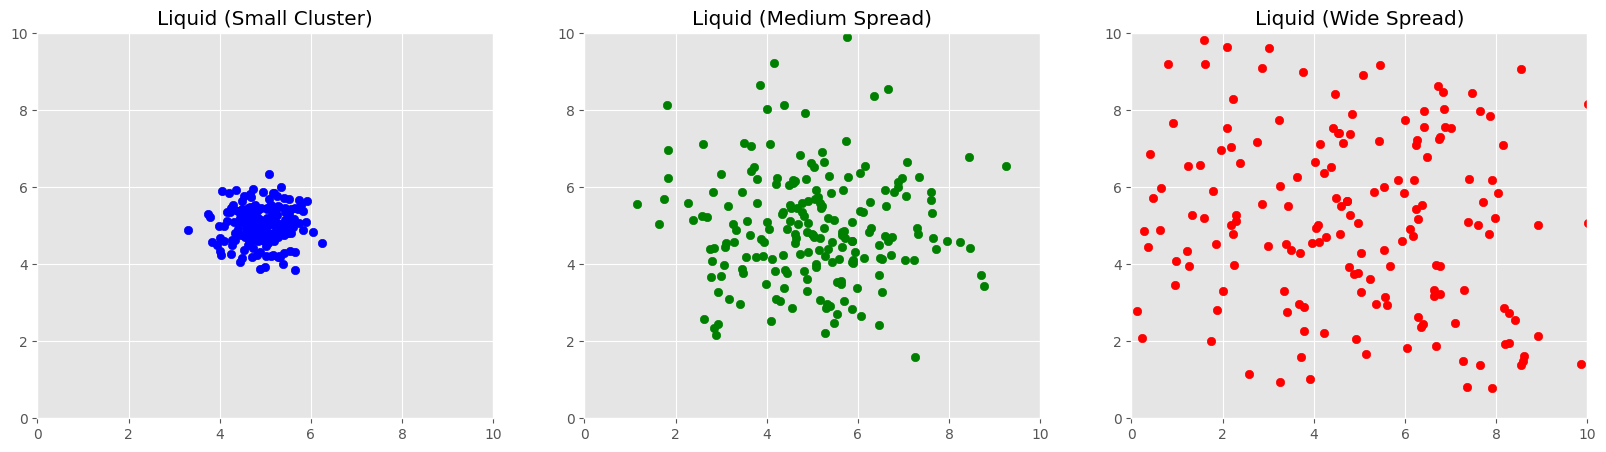

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# Small cluster (tight liquid)
x, y = np.random.normal(loc=5, scale=0.5, size=200), np.random.normal(loc=5, scale=0.5, size=200)
axs[0].scatter(x, y, color="blue")
axs[0].set_title("Liquid (Small Cluster)")
axs[0].set_xlim(0, 10)
axs[0].set_ylim(0, 10)
# Medium spread cluster
x, y = np.random.normal(loc=5, scale=1.5, size=200), np.random.normal(loc=5, scale=1.5, size=200)
axs[1].scatter(x, y, color="green")
axs[1].set_title("Liquid (Medium Spread)")
axs[1].set_xlim(0, 10)
axs[1].set_ylim(0, 10)
# Wide spread cluster
x, y = np.random.normal(loc=5, scale=3, size=200), np.random.normal(loc=5, scale=3, size=200)
axs[2].scatter(x, y, color="red")
axs[2].set_title("Liquid (Wide Spread)")
axs[2].set_xlim(0, 10)
axs[2].set_ylim(0, 10)
plt.show()

## So how to define Entropy?

Entropy is defined as the shortest expected length sequence that can contain the information of one experiment.

$$\text{Entropy} = -\sum_i \log(P_i) $$

### The Mathematical Definition of Entropy

In information theory, **entropy** (often denoted as $H$) is calculated for a random variable $X$ with a set of possible outcomes $\{x_1, x_2, \dots, x_n\}$ and their probabilities $\{P(x_1), P(x_2), \dots, P(x_n)\}$.  

The formula is:

$$
H(X) = - \sum_{i=1}^{n} P(x_i) \log_2 \big(P(x_i)\big)
$$

- The unit of entropy is **bits**.  
- The term $\log_2(P(x_i))$ can be thought of as the "*amount of surprise*" for a single outcome $x_i$.  
  - Rare events (low $P(x_i)$) have a large surprise value.  
  - Common events (high $P(x_i)$) have a small surprise value.  
- Entropy is the **expected value** (or weighted average) of the surprise across all possible outcomes.  
  It tells us the **average amount of information** we get from one observation of the random variable.


Here is an example of a tree that tries to actually show this bound, called the Huffman tree. The more frequent letters like A have the shortest code, just call it 0, and the less frequent ones have longer code. We can show that to minimize the expected length of the code, that is the probability of the code times the length of the code averaged over all letters, the best result we can get is the bound shown above.

### Application: Data Compression and Huffman Coding

So, what is entropy useful for?  
In computer science, it provides the **theoretical limit for data compression**.  
- The more unpredictable (high entropy) a piece of data is, the harder it is to compress.

A brilliant algorithm that leverages this is **Huffman Coding**.  
- It creates an **optimal method for encoding data** by assigning **shorter binary codes** to more frequent symbols and **longer codes** to less frequent ones.  
- The goal is to **minimize the average code length**, and the theoretical best-case average is given by the **data's entropy**.

The image below shows a **Huffman tree** built for a set of characters.


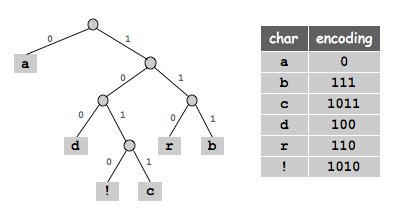

### How to Read the Huffman Tree

To find the binary code for any character, start at the top (**the root**) and trace the path down to the character's gray box:  
- **Left turn = 0**  
- **Right turn = 1**  

**Examples:**  
- `'a'`: From the root, take **one left branch** → code is `0`  
- `'d'`: From the root, go **Right → Left → Left** → code is `100`  
- `'r'`: From the root, go **Right → Right → Left** → code is `110`  
- `'c'`: From the root, go **Right → Left → Right → Right** → code is `1011`  

Notice how this perfectly matches the encoding table on the right.  
- The character `'a'`, which is most frequent, has the **shortest possible code** (1 bit).  
- Infrequent characters like `'c'` and `'!'` are deeper in the tree and receive **longer codes** (4 bits).  

This is exactly how file compression formats like **.zip** work to save space.


In [ ]:
#Huffman Tree
import heapq
from collections import Counter, namedtuple
# Node for Huffman Tree
class Node(namedtuple("Node", ["char", "freq", "left", "right"])):
    def walk(self, code, acc):
        if self.char is not None:  # Leaf node
            code[self.char] = acc or "0"
        else:
            self.left.walk(code, acc + "0")
            self.right.walk(code, acc + "1")
def huffman_coding(s):
    # Frequency of each character
    freq = Counter(s)
    heap = []
    # Add a counter for tie-breaking to avoid comparing None with strings
    counter = 0
    for ch, fr in freq.items():
        heap.append((fr, counter, Node(ch, fr, None, None)))
        counter += 1
    heapq.heapify(heap)
    while len(heap) > 1:
        lo_freq, lo_count, lo_node = heapq.heappop(heap)
        hi_freq, hi_count, hi_node = heapq.heappop(heap)
        merged_freq = lo_freq + hi_freq
        merged_node = Node(None, merged_freq, lo_node, hi_node)
        heapq.heappush(heap, (merged_freq, counter, merged_node))
        counter += 1
    # Walk tree to generate codes
    code = {}
    if heap:
        # The root node is the third element of the tuple
        [root_tuple] = heap
        root_node = root_tuple[2]
        root_node.walk(code, "")
    return code
# Example text
text = "abracadabra!"
# Build Huffman codes
codes = huffman_coding(text)
print("Character | Huffman Code")
for ch, c in codes.items():
    print(f"   {repr(ch)}     | {c}")
# Encode the text
encoded = "".join(codes[ch] for ch in text)
print("\nOriginal length (bits):", len(text) * 8)
print("Encoded length (bits):", len(encoded))
print("Compression ratio:", round(len(encoded) / (len(text) * 8), 2))

Character | Huffman Code
   'a'     | 0
   '!'     | 100
   'b'     | 101
   'r'     | 110
   'c'     | 1110
   'd'     | 1111

Original length (bits): 96
Encoded length (bits): 28
Compression ratio: 0.29
